# Imports

In [2]:
from numpy.random import seed
seed(888)
import tensorflow as tf
tf.random.set_seed(404)

In [164]:
import os
import numpy as np
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


from IPython.display import display
from tensorflow.keras.utils import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [158]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATOIN_SIZE = 10000
small_train_size = 1000

# Get the Data

In [5]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

# Explore the Data

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

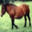

In [7]:
pic = array_to_img(x_train_all[7])
display(pic)

In [8]:
y_train_all.shape

(50000, 1)

In [9]:
y_train_all[7][0]

7

In [10]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

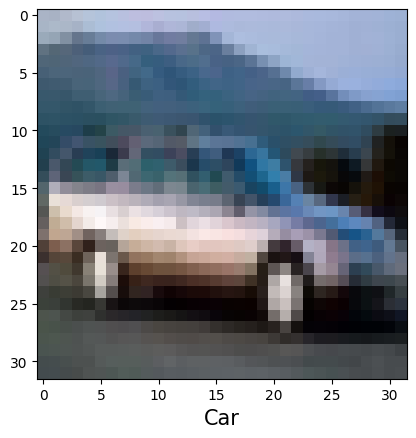

In [11]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

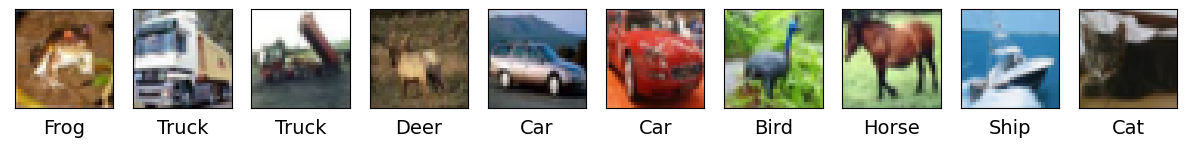

In [12]:
plt.figure(figsize=(15, 5))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])


In [13]:
x_train_all[0].shape

(32, 32, 3)

In [14]:
nr_images, x, y, c = x_train_all.shape
print(f' images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c }')

 images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [15]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [16]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [17]:
x_train_all, x_test= x_train_all / 255.0, x_test/255.0  #255 is the largest value in RGB scale and it will make all values range from 0 to 1

In [18]:
# x_train_all[0][0][0][0]
type(x_train_all[0][0][0][0])

numpy.float64

In [19]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS )

In [20]:
x_train_all.shape

(50000, 3072)

In [21]:
x_test = x_test.reshape(len(x_test),TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


# Create Validation Dataset

In [60]:
x_val = x_train_all[:VALIDATOIN_SIZE]
y_val = y_train_all[:VALIDATOIN_SIZE]
x_val.shape

(10000, 3072)

In [61]:
x_train = x_train_all[VALIDATOIN_SIZE:]
y_train = y_train_all[VALIDATOIN_SIZE:]
x_train.shape  

(40000, 3072)

# Creating a small dataset

In [62]:
x_train_xs = x_train[:small_train_size]
y_train_xs = y_train[:small_train_size]

# Define the Neural Network using Keras

In [98]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu',name= 'm1_hidden1'),
    Dense(units=64, activation='relu', name= 'm1_hidden2'),
    Dense(units=16, activation='relu', name= 'm1_hidden3'),
    Dense(units=10, activation='softmax', name= 'm1_output')
])

model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [99]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [100]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [34]:
type(model_1)

keras.engine.sequential.Sequential

In [35]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [39]:
(32*32*3*128 + 128) + (128*64 + 64) + (64*16 + 16) + (16*10 + 10 )
#input to the layer * output + no of bias terms
#input for first model is 32*32*3 (height*width*RGB) for picture which is the input to the first model

402810

# Tensorboard(Visualising Learning)

In [74]:
def get_tensorboard(model_name):
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print("Successfully Created Directory")

    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [86]:
sample_per_batch=1000


In [95]:
# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, batch_size=sample_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))

Successfully Created Directory


In [101]:
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=sample_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully Created Directory


In [96]:
# nr_epochs = 150
# model_2.fit(x_train_xs, y_train_xs, batch_size=sample_per_batch, epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 2')], verbose=0, validation_data=(x_val, y_val))

Successfully Created Directory


In [102]:
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=sample_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully Created Directory


In [103]:
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=sample_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 3 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully Created Directory


# Prediction on Individual Images

In [106]:
# taking a simnple image for testing
x_val[0].shape

(3072,)

In [108]:
test = np.expand_dims(x_val[0],axis=0) #adding more dimention to data

In [115]:
np.set_printoptions(precision=3) # setting the precision of prediction upto 3 decimal points

In [116]:
model_2.predict(test) #looking to the prediction(10 prediction)

1/1 [==============================] - 0s 40ms/step


array([[0.027, 0.01 , 0.168, 0.118, 0.203, 0.13 , 0.287, 0.055, 0.   ,
        0.001]], dtype=float32)

In [118]:
# for more than one images
model_2.predict(x_val).shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [121]:
# For the largest values from these 10 prediction which is the best prediction
np.argmax(model_2.predict(test),axis=1) # predicton

1/1 [==============================] - 0s 20ms/step


array([6], dtype=int64)

In [123]:
y_val[0] # Label
# here we can see the model has predicted it as 6 and it's label is also 6
# Hence, our prediction is correct

array([6], dtype=uint8)

In [137]:
for i in range (10):
    test_img =  np.expand_dims(x_val[i],axis=0)
    predicted_value = np.argmax(model_2.predict(test_img),axis=1)[0]
    print(f'Actual value: {y_val[i][0]} vs Predicted: {predicted_value}')
    # print(f'val {i} is {predicted_value}.')
    # print(f'The label of {i}th element is {y_val[i]}.')

1/1 [==============================] - 0s 69ms/step
Actual value: 6 vs Predicted: 6
1/1 [==============================] - 0s 25ms/step
Actual value: 9 vs Predicted: 1
1/1 [==============================] - 0s 19ms/step
Actual value: 9 vs Predicted: 9
1/1 [==============================] - 0s 24ms/step
Actual value: 4 vs Predicted: 4
1/1 [==============================] - 0s 29ms/step
Actual value: 1 vs Predicted: 8
1/1 [==============================] - 0s 22ms/step
Actual value: 1 vs Predicted: 9
1/1 [==============================] - 0s 25ms/step
Actual value: 2 vs Predicted: 6
1/1 [==============================] - 0s 20ms/step
Actual value: 7 vs Predicted: 7
1/1 [==============================] - 0s 17ms/step
Actual value: 8 vs Predicted: 8
1/1 [==============================] - 0s 20ms/step
Actual value: 3 vs Predicted: 6


# Evaluation

In [139]:
model_2.metrics_names

['loss', 'accuracy']

In [141]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 2ms/step - loss: 1.4189 - accuracy: 0.4911
Test loss is 1.42 and test accuracy is 49.1%


# Confusion Matrix

In [148]:
predictions = np.argmax(model_2.predict(x_test),axis=1)
conf_matrix = confusion_matrix(y_true = y_test, y_pred=predictions)

313/313 [==============================] - 0s 1ms/step


In [172]:
conf_matrix.shape

(10, 10)

In [175]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]


In [152]:
conf_matrix.max()

641

In [154]:
conf_matrix.min()

7

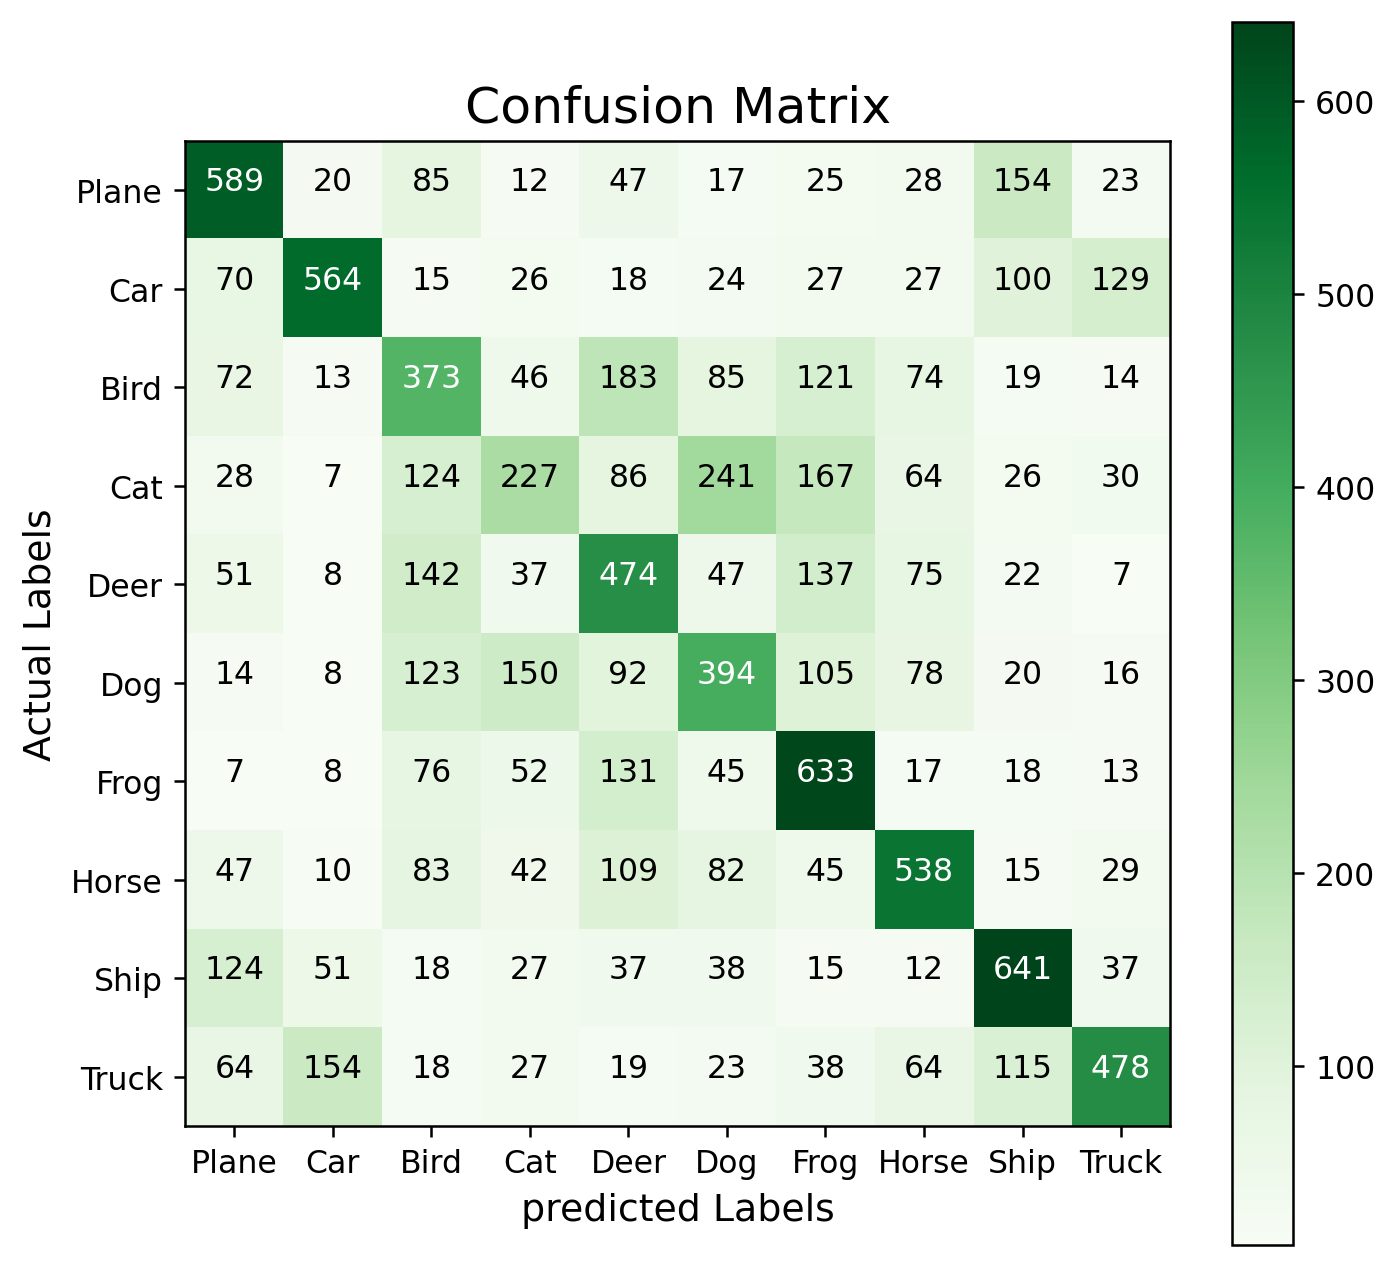

In [186]:
plt.figure(figsize=(7, 7),dpi=227)
# show conf matrix with color map green
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)  # tick marks range
plt.yticks(tick_marks, LABEL_NAMES)  # give name to tick marks
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

# making a iterative loop in a advance form
for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
             color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

###### 1.Diagonal are true positives(this is true and model predicted true)
###### 2.In rows are false negative(this is true but model predicted false)
###### 3.In cols are false positive(this is false but model predicted true)

In [188]:
# True Positives
np.diag(conf_matrix)

array([589, 564, 373, 227, 474, 394, 633, 538, 641, 478], dtype=int64)

In [190]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix,axis =1) # axis 1 means row
recall

array([0.589, 0.564, 0.373, 0.227, 0.474, 0.394, 0.633, 0.538, 0.641,
       0.478])

In [191]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix,axis = 0) #axis 0 meas col
precision

array([0.553, 0.669, 0.353, 0.351, 0.396, 0.396, 0.482, 0.551, 0.567,
       0.616])

In [194]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

f1_score = 2* (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')


Model 2 recall score is 49.11%
Model 2 precision score is 49.34%
Model 2 f score is 49.22%
